## Area preserving Maps (separatrix maps)

\begin{eqnarray}
y_{n+1} &=& y_n + K \sin x_{n} \\
x_{n+1} &=& x_n + {\rm sign} (y_{n+1}) |y_{n+1}|^\gamma \\
\end{eqnarray}

Our state vector [x,y]
with angle $x \in [0,2\pi]$

If $\gamma=1$ then we recover the Standard map but usually keeping $y \in [0, 2\pi]$.

If $\gamma=1.5$ we have the Kepler map.




In [1]:
# import python libraries
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import odeint
import math
%matplotlib inline


In [2]:
twopi=2.0*np.pi

MOD_STD = True   # if this is true, then keep standard map with y in [0, 2pi]
# set this to false if you want to look at diffusive behavior for example

# fill a vector with nsteps of the map
# arguments:
#   x0,y0 is initial condition, mgamma, K are parameters for the map
#   n is number of iterations requested
# returns: a vector for x and a vector for y
#    for each of n iterations of the map
def n_steps(x0,y0,n,mgamma,K):
    xvec = np.zeros(0)  # make an array to store iterations 
    yvec = np.zeros(0)
    xn = x0  # initial conditions 
    yn = y0
    xvec = np.append(xvec,x0)  # append initial conditions to array 
    yvec = np.append(yvec,y0)
    for i in range(n):  #iterations loop
        ynplus1 = yn + K*np.sin(xn)  # the map!
        if (mgamma==1.0):  # standard map!
            if (MOD_STD == True):
                ynplus1 = ynplus1%twopi  # modulo 2pi
            xnplus1 = xn + ynplus1
        else:
            xnplus1 = xn + np.sign(ynplus1)*np.abs(ynplus1)**mgamma  
         
        xnplus1 = xnplus1%twopi  # x modulo 2pi
        xvec = np.append(xvec,xnplus1)  #store position in arrays
        yvec = np.append(yvec,ynplus1)
        xn = xnplus1  # update positions so can iterate
        yn = ynplus1
        
    return xvec,yvec

colorstr = ['red', 'green', 'blue', 'orange', 'magenta', 'cyan','brown','gray','violet']
lcstr = len(colorstr)

# call previous routine and plot a single orbit with a randomly choosen color
# arguments: ax is plotting axis, x0,y0 are initial conditions, n is number of points
# gamma, K are parameters of map
def plt_nsteps(ax,x0,y0,n,mgamma,K):
    xvec,yvec = n_steps(x0,y0,n,mgamma,K)
    k = np.random.randint(0, high=lcstr)
    ax.plot(xvec,yvec,'.',markersize=1,markeredgecolor='none',color=colorstr[k])
    

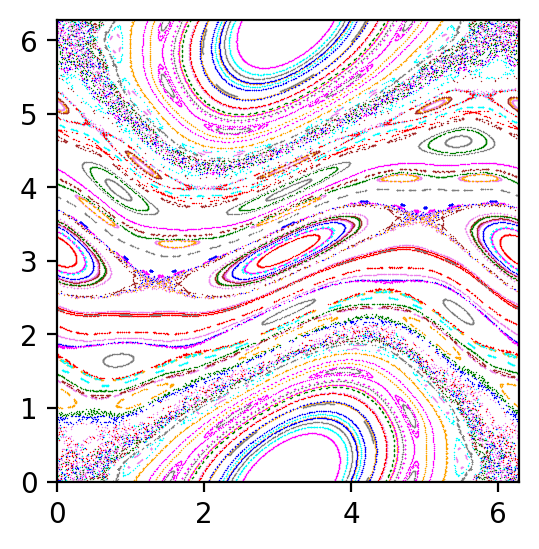

In [5]:
fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=200)
ax.set_xlim([0,twopi])
ax.set_ylim([0,twopi])
ax.set_aspect('equal')

n=500  # number of steps of the map
K=0.9  # parameter for map
mgamma=1.0   # standard map
for i in range(100):
    x0 = np.random.random()*twopi
    y0 = np.random.random()*twopi
    plt_nsteps(ax,x0,y0,n,mgamma,K)



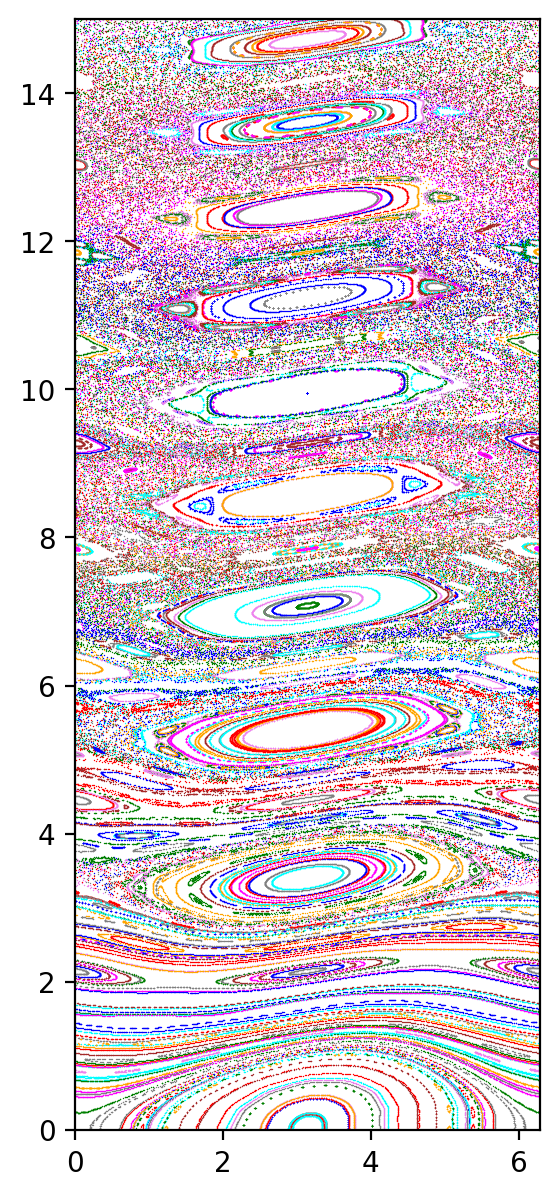

In [6]:
fig,ax = plt.subplots(1,1,figsize=(3,8),dpi=200)
ax.set_xlim([0,twopi])
ax.set_ylim([0,15])
ax.set_aspect('equal')

n=500  # number of steps of the map
K=0.3  # parameter for map
mgamma=1.5   # standard map
for i in range(500):
    x0 = np.random.random()*twopi
    y0 = np.random.random()*15
    plt_nsteps(ax,x0,y0,n,mgamma,K)

